### Team_Complete

# XGBoost

- 스케일링 X

In [1]:
import pandas as pd
import numpy as np 
import warnings

import matplotlib as mpl
import matplotlib.pylab as plt

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings(action='ignore')
%matplotlib inline
np.random.seed(seed=2021)

## 01. 데이터 불러오기

In [11]:
df_미숫_raw = pd.read_csv("C:/workspace/weather/feature-target/미숫가루_곡물가루.csv", encoding='cp949')
df_미숫_raw.head()

,date,PC1,PC2,미숫가루_곡물가루
0,2018-01-01T00:00:00Z,-3.719474,0.965108,5.917316
1,2018-01-02T00:00:00Z,-3.741912,0.888377,9.481753
2,2018-01-03T00:00:00Z,-4.074829,0.748572,8.560131
3,2018-01-04T00:00:00Z,-4.325838,0.235772,12.890737
4,2018-01-05T00:00:00Z,-3.772842,0.246325,10.813458


In [12]:
# 데이터셋 전처리

#원본 보관  
df_미숫 = df_미숫_raw

#날짜 컬럼 인덱스로 지정
df_미숫 = df_미숫.set_index('date')

## 02. train/test split

In [13]:
#train 2018 , test 2019로 분리
X_train = df_미숫.iloc[0:365,:-1]
y_train = df_미숫.iloc[0:365,-1]
X_test  = df_미숫.iloc[365:730,:-1]
y_test  = df_미숫.iloc[365:730,-1]

#차원 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((365, 2), (365,), (365, 2), (365,))

## 03. 모델생성 및 학습

In [14]:
# 모델 학습 및 평가

#모델생성
XGBR = XGBRegressor()

#하이퍼 파라미터 확인
XGBR.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [15]:
# GridSearch를 위한 하이퍼파라미터 값 지정
params = {'objective':['reg:squarederror'],
          'learning_rate': [.03, 0.05, .07],
          'max_depth': [5, 6, 7],
          'min_child_weight': [4, 5],
          'subsample': [0.7],
          'colsample_bytree': [0.7],
          'n_estimators': [300, 450]}


# GridsearchCV() 메서드를 이용해 훈련 모델 할당
gscv_XGBR = GridSearchCV(XGBR, param_grid=params, cv = 10)

# 모형 학습 
gscv_XGBR.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [16]:
#최적 하이퍼 파라미터 확인
gscv_XGBR.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 300,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [17]:
#최적 파라미터에 대한 평가 점수 확인
gscv_XGBR.best_score_

-2.1365212054121283

## 04. 모델평가

In [18]:
#r2 socre
gscv_XGBR_fit = gscv_XGBR.best_estimator_
XGBR_pred = gscv_XGBR_fit.predict(X_test)
r2_score(y_test, XGBR_pred)

0.4618201948834588

In [19]:
# RMSE
MSE = mean_squared_error(y_test, XGBR_pred) 
np.sqrt(MSE)

4.135095151373862

## 05. 시각화

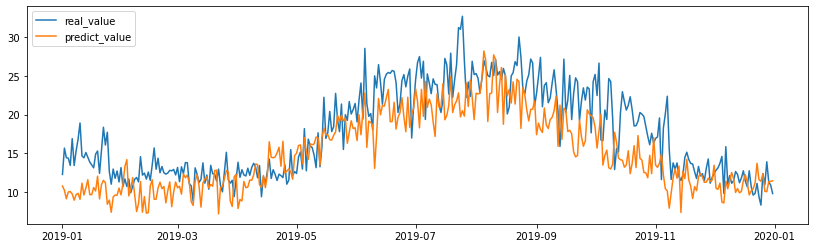

In [20]:
# 예측값 시각화
test_date = pd.to_datetime(df_미숫_raw.iloc[365:730,0].astype('str'))
plt.figure(figsize=(14,4))
plt.plot(test_date, y_test, label='real_value')
plt.plot(test_date, XGBR_pred, label='predict_value')
plt.legend(loc='upper left')
plt.show()